# This file contains python code to calculate LOWESS curves and potential inflection ages for this study's Sr isotope data

## Define modules and import data

In [1]:
#Import python modules

from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from scipy.stats import sem, t
lowess = sm.nonparametric.lowess
from scipy.stats import sem, t
from scipy.interpolate import interp1d # for interpolation of new data points

In [2]:
#Import and Define Data

filePoz = pd.read_excel('../Data/PozarySr.xlsx')
Pozarydata = filePoz[['Age','Sr','Error']]
data_extract_Sr = Pozarydata['Sr']
data_extract_age = Pozarydata['Age']
data_extract_error = Pozarydata['Error']

Sr = data_extract_Sr[0:19].to_numpy()
Age = data_extract_age[0:19].to_numpy()
Error = data_extract_error.to_numpy()

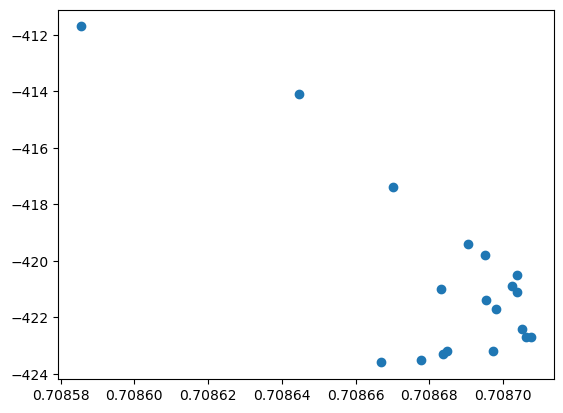

In [3]:
#Scatter Plot

plt.scatter(Sr, Age)

## Calculate LOWESS

In [4]:
#Calculate LOWESS

fraction = 0.85 #fraction defines 'window' of data used to calculate LOWESS
Srlowess = lowess(Sr, Age, frac=fraction) 

lowessdata = pd.DataFrame({'Age':Srlowess[:,0],'LOWESS':Srlowess[:,1]})

lowessdata

,Age,LOWESS
0,-423.6,0.708686
1,-423.5,0.708686
2,-423.3,0.708688
3,-423.2,0.708689
4,-423.2,0.708689
5,-422.7,0.708692
6,-422.7,0.708692
7,-422.4,0.708694
8,-421.7,0.708698
9,-421.4,0.708699


## Calculate LOWESS first and second derivatives

In [5]:
#LOWESS First Derivative

n = len(lowessdata)
        
#GTS 2020       
lowessfirstderiv = np.zeros(n)

for i in range(n):
    if i == 0:
        lowessfirstderiv[i] = np.NaN
    else:
        lowessfirstderiv[i] = (lowessdata['LOWESS'][i] - lowessdata['LOWESS'][i-1])/\
        (lowessdata['Age'][i] - lowessdata['Age'][i-1])
            
        
#Make dataframe
lowessfirstderivdata = pd.DataFrame({'Age':lowessdata['Age'],'LOWESS 1D':lowessfirstderiv})

lowessfirstderivdata

C:\Users\avila\AppData\Local\Temp\ipykernel_2392\2349541457.py:12: RuntimeWarning: invalid value encountered in double_scalars
  lowessfirstderiv[i] = (lowessdata['LOWESS'][i] - lowessdata['LOWESS'][i-1])/\


,Age,LOWESS 1D
0,-423.6,NaN
1,-423.5,0.000008
2,-423.3,0.000007
3,-423.2,0.000007
4,-423.2,NaN
5,-422.7,0.000007
6,-422.7,NaN
7,-422.4,0.000006
8,-421.7,0.000007
9,-421.4,0.000003


In [6]:
#LOWESS Second Derivative

n = len(lowessdata)

lowesssecondderiv = np.zeros(n)

for i in range(n):
    if i == 0:
        lowesssecondderiv[i]=np.NaN
    else:
        lowesssecondderiv[i] = (lowessfirstderivdata['LOWESS 1D'][i] - lowessfirstderivdata['LOWESS 1D'][i-1])/\
        (lowessfirstderivdata['Age'][i] - lowessfirstderivdata['Age'][i-1])

#Make dataframe
lowesssecondderivdata = pd.DataFrame({'Age':lowessdata['Age'],'LOWESS 2D':lowesssecondderiv})

lowesssecondderivdata

,Age,LOWESS 2D
0,-423.6,NaN
1,-423.5,NaN
2,-423.3,-1.541837e-06
3,-423.2,-2.762595e-06
4,-423.2,NaN
5,-422.7,NaN
6,-422.7,NaN
7,-422.4,NaN
8,-421.7,8.155379e-08
9,-421.4,-1.235289e-05


In [7]:
#Combine Data

lowessgradientdata = pd.DataFrame({'Age':lowessdata['Age'],'LOWESS':lowessdata['LOWESS'],\
                              'LOWESS 1D': lowessfirstderiv,'LOWESS 2D':lowesssecondderiv})

lowessgradientdata

,Age,LOWESS,LOWESS 1D,LOWESS 2D
0,-423.6,0.708686,NaN,NaN
1,-423.5,0.708686,0.000008,NaN
2,-423.3,0.708688,0.000007,-1.541837e-06
3,-423.2,0.708689,0.000007,-2.762595e-06
4,-423.2,0.708689,NaN,NaN
5,-422.7,0.708692,0.000007,NaN
6,-422.7,0.708692,NaN,NaN
7,-422.4,0.708694,0.000006,NaN
8,-421.7,0.708698,0.000007,8.155379e-08
9,-421.4,0.708699,0.000003,-1.235289e-05


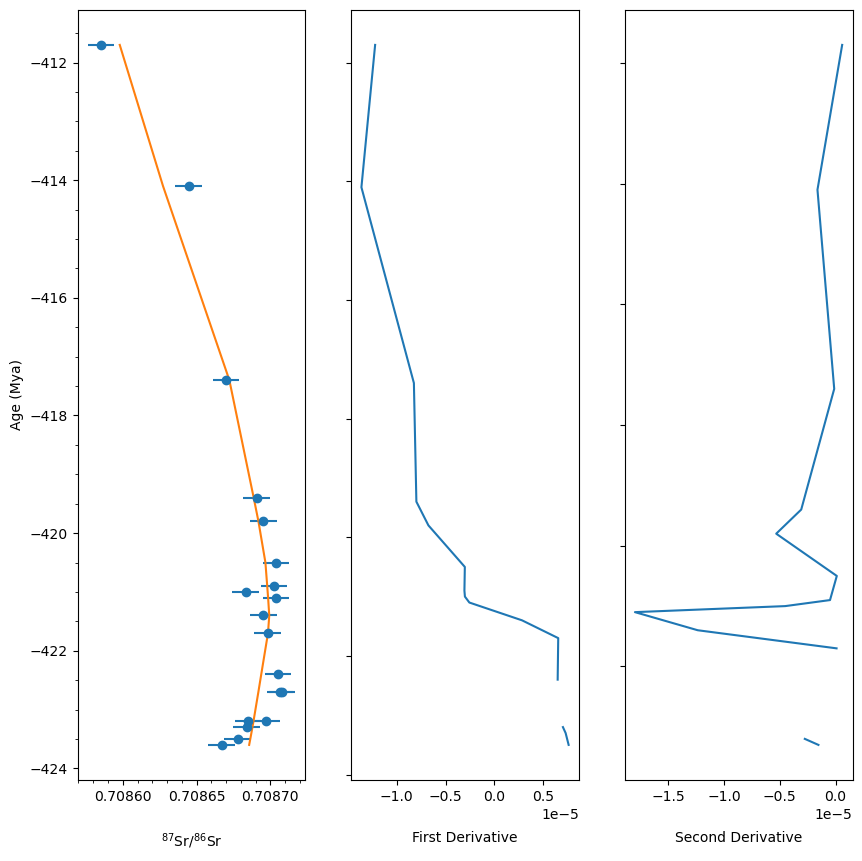

In [8]:
#Plot LOWESS and Data

xL = lowessgradientdata['LOWESS']
yL = lowessgradientdata['Age']
xS = Sr
yS = Age

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,10))

ax1.errorbar(Sr, Age, xerr=Error, fmt="o")
ax1.plot(xL,yL)
ax1.yaxis.get_ticklocs(minor=True)
ax1.minorticks_on()
ax1.set(xlabel='$\mathregular{^{87}Sr/^{86}Sr}$')
ax1.set(ylabel='Age (Mya)')
ax1.xaxis.labelpad = 20

ax2.plot(lowessgradientdata['LOWESS 1D'],lowessgradientdata['Age'])
ax2.yaxis.set_ticklabels([])
ax2.set(xlabel='First Derivative')
ax2.xaxis.labelpad = 20

ax3.plot(lowessgradientdata['LOWESS 2D'],lowessgradientdata['Age'])
ax3.yaxis.set_ticklabels([])
ax3.set(xlabel='Second Derivative')
ax3.xaxis.labelpad = 20

## Calculate inflection point

We define the inflection point as the lowest value of the second derivative curve

In [9]:
#Find lowest value of second derivative curve

inf_85 = lowessgradientdata['Age'][lowessgradientdata['LOWESS 2D'].idxmin()]

print('The lowest value of the second derivative curve (with fraction =',fraction,') occurs at',\
      inf_85,'Ma')

The lowest value of the second derivative curve (with fraction = 0.85 ) occurs at -421.1 Ma


In [10]:
#Export data

df = pd.DataFrame({'Fraction':[fraction],'Inflection Age':[inf_85]})

df.to_csv(r'../Results/inf_85.csv',index=False)